<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-01/LAB_01_SIS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CONTEXTO DEL LAB-01 SIS420**

A partir de los cuadernillos revisados en clase, buscar un dataset, que contenga al menos 6 propiedades (n>5) y por lo menos 10000 ejemplos (m>10000), para entrenar el modelo con este dataset, y realizar las respectivas predicciones (por lo menos 10 predicciones) que demuestren la efectividad del mismo. Se debe subir los cuadernillos modificados, el dataset y todo aquello que considere necesario para completar con el ejercicio.

Para la determinacion de los parametros theta se debe considerar aplicar un modelo de regresion lineal multivariable, una regresion polinomica y el calculo por la ecuacion de la normal, donde es importante incluir el respectivo grafico de costo para cada caso, los tres modelos, su entrenamiento y validacion debe estar en un solo cuadernillo, en los cuadros de texto se debe incluir la explicacion respectiva, eliminando todo el texto que se encuentra en los cuadernillos revisados en clase.

El cuadernillo se debe subir al repositorio github el cuadernillo e incluir la direccion del repositorio y el cuadernillo en ecampus, ademas de una explicación suficiente del trabajo realizado.

# **PREPARACIÓN DEL DATASET **


In [ ]:
#Importamos las librerias para el procesamiento de datos
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import shutil as sh
from sklearn.model_selection import train_test_split

In [ ]:
#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

In [ ]:
#Importamos los datos desde el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copiamos la ruta del archivo
sh.copy("/content/drive/MyDrive/SIS420-IA/Material/Datasets/database_15min.csv","/content/database_15min.csv")

'/content/database_15min.csv'

In [ ]:
#Importamos el dataset
data = pd.read_csv('/content/database_15min.csv')

In [ ]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 100)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [ ]:
# Para DataFrames de Pandas
pd.set_option('display.max_columns', None)

# Para arrays NumPy
# np.set_printoptions(threshold=np.inf)

In [ ]:
#mostramos el dataset
data

,21-11-19 09:03,4206.0,4206.5,4204.5,4206.0.1,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.44,-0.377,4200.0
0,21-11-19 09:04,4206.5,4206.5,4205.0,4205.5,4451,187200190.0,1175,4202.1,4202.5,4202.9,4201.3,-0.304,-0.136,0.459,-0.090,-0.320,4201.0
1,21-11-19 09:05,4205.5,4206.5,4203.0,4204.5,6515,273933345.0,1627,4202.5,4202.5,4203.1,4201.4,-0.099,-0.134,0.679,0.105,-0.235,4199.0
2,21-11-19 09:06,4204.5,4204.5,4203.0,4203.5,2751,115640535.0,801,4202.6,4202.5,4203.1,4201.4,-0.005,-0.127,0.658,0.176,-0.153,4201.0
3,21-11-19 09:07,4203.0,4204.0,4202.0,4202.5,3360,141218695.0,1038,4202.6,4202.5,4203.1,4201.4,-0.007,-0.120,0.486,0.151,-0.092,4207.0
4,21-11-19 09:08,4202.0,4203.0,4201.5,4202.0,2545,106941715.0,900,4202.5,4202.5,4203.1,4201.4,-0.051,-0.116,0.290,0.089,-0.056,4211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,31-03-20 12:45,5197.0,5197.5,5196.5,5197.0,63,3274000.0,24,5196.3,5196.3,5196.8,5195.7,-0.120,-0.811,0.189,0.334,0.240,5197.5
33073,31-03-20 12:46,5196.5,5197.5,5196.0,5197.5,76,3949415.0,27,5196.5,5196.4,5196.9,5195.7,-0.010,-0.765,0.254,0.398,0.271,5197.0
33074,31-03-20 12:47,5197.5,5198.0,5197.0,5198.0,108,5613470.0,43,5196.7,5196.4,5197.0,5195.8,0.127,-0.714,0.340,0.484,0.314,5198.0
33075,31-03-20 12:48,5197.5,5198.0,5197.0,5197.5,84,4365980.0,28,5196.8,5196.4,5197.1,5195.9,0.204,-0.662,0.307,0.506,0.352,5197.0


In [ ]:
# Supongamos que quieres ver cuántas clases distintas hay en la columna 'clase'
num_clases = data['4206.0.1'].nunique()

# Imprime el número de clases distintas
print("Número de clases distintas:", num_clases)

Número de clases distintas: 2247


In [ ]:
#Leemos los datos y la cantidad de los mismos
print('DATOS')
print(data)
print('\nCANTIDAD')
print(data.shape)

DATOS
       21-11-19 09:03  4206.0  4206.5  4204.5  4206.0.1  5024  211292030.0  \
0      21-11-19 09:04  4206.5  4206.5  4205.0    4205.5  4451  187200190.0   
1      21-11-19 09:05  4205.5  4206.5  4203.0    4204.5  6515  273933345.0   
2      21-11-19 09:06  4204.5  4204.5  4203.0    4203.5  2751  115640535.0   
3      21-11-19 09:07  4203.0  4204.0  4202.0    4202.5  3360  141218695.0   
4      21-11-19 09:08  4202.0  4203.0  4201.5    4202.0  2545  106941715.0   
...               ...     ...     ...     ...       ...   ...          ...   
33072  31-03-20 12:45  5197.0  5197.5  5196.5    5197.0    63    3274000.0   
33073  31-03-20 12:46  5196.5  5197.5  5196.0    5197.5    76    3949415.0   
33074  31-03-20 12:47  5197.5  5198.0  5197.0    5198.0   108    5613470.0   
33075  31-03-20 12:48  5197.5  5198.0  5197.0    5197.5    84    4365980.0   
33076  31-03-20 12:49  5197.5  5197.5  5196.5    5197.0   129    6704035.0   

       1443  4201.6  4202.4  4202.8  4201.2  -0.637  -0.1

In [ ]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes que podrian tener las columnas X
print('INFORMACION DE TIPO DE DATOS')
data.info()
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33077 entries, 0 to 33076
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   21-11-19 09:03  33077 non-null  object 
 1   4206.0          33077 non-null  float64
 2   4206.5          33077 non-null  float64
 3   4204.5          33077 non-null  float64
 4   4206.0.1        33077 non-null  float64
 5   5024            33077 non-null  int64  
 6   211292030.0     33077 non-null  float64
 7   1443            33077 non-null  int64  
 8   4201.6          33077 non-null  float64
 9   4202.4          33077 non-null  float64
 10  4202.8          33077 non-null  float64
 11  4201.2          33077 non-null  float64
 12  -0.637          33077 non-null  float64
 13  -0.126          33077 non-null  float64
 14  -0.125          33077 non-null  float64
 15  -0.44           33077 non-null  float64
 16  -0.377          33077 non-null  float64
 17  42

# PROCESAMIENTO DE DATOS

In [ ]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = data.columns.get_loc('4206.0.1')
columnas = list(data.columns)
columnas.pop(indice_columna)
columnas.append('4206.0.1')
data = data[columnas]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33077 entries, 0 to 33076
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   21-11-19 09:03  33077 non-null  object 
 1   4206.0          33077 non-null  float64
 2   4206.5          33077 non-null  float64
 3   4204.5          33077 non-null  float64
 4   5024            33077 non-null  int64  
 5   211292030.0     33077 non-null  float64
 6   1443            33077 non-null  int64  
 7   4201.6          33077 non-null  float64
 8   4202.4          33077 non-null  float64
 9   4202.8          33077 non-null  float64
 10  4201.2          33077 non-null  float64
 11  -0.637          33077 non-null  float64
 12  -0.126          33077 non-null  float64
 13  -0.125          33077 non-null  float64
 14  -0.44           33077 non-null  float64
 15  -0.377          33077 non-null  float64
 16  4200.0          33077 non-null  float64
 17  4206.0.1        33077 non-null 

In [ ]:
#variables categoricas, donde convertimos a int64
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [ ]:
#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:
#Fechas a numeros aunque no se utiliza en este caso
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [ ]:
# Mostramos los resultados del Dataset
# print(data)
data

,21-11-19 09:03,4206.0,4206.5,4204.5,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.44,-0.377,4200.0,4206.0.1
0,20879,4206,4206,4205,4451,187200190,1175,4202,4202,4202,4201,0,0,0,0,0,4201,4205
1,20880,4205,4206,4203,6515,273933345,1627,4202,4202,4203,4201,0,0,0,0,0,4199,4204
2,20881,4204,4204,4203,2751,115640535,801,4202,4202,4203,4201,0,0,0,0,0,4201,4203
3,20882,4203,4204,4202,3360,141218695,1038,4202,4202,4203,4201,0,0,0,0,0,4207,4202
4,20883,4202,4203,4201,2545,106941715,900,4202,4202,4203,4201,0,0,0,0,0,4211,4202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,33065,5197,5197,5196,63,3274000,24,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33073,33066,5196,5197,5196,76,3949415,27,5196,5196,5196,5195,0,0,0,0,0,5197,5197
33074,33067,5197,5198,5197,108,5613470,43,5196,5196,5197,5195,0,0,0,0,0,5198,5198
33075,33068,5197,5198,5197,84,4365980,28,5196,5196,5197,5195,0,0,0,0,0,5197,5197


In [ ]:
# Convertimos a int64 a todos los valores de X
data = data.astype('int64', errors='ignore')

In [ ]:
#Verificamos todos los datos del Dataset
print("INFORMACION")
print(data)
print("\nTIPOS DE DATOS")
data.info()
print("\nDATOS VACIOS")
print(pd.isnull(data).sum())

INFORMACION
       21-11-19 09:03  4206.0  4206.5  4204.5  5024  211292030.0  1443  \
0               20879    4206    4206    4205  4451    187200190  1175   
1               20880    4205    4206    4203  6515    273933345  1627   
2               20881    4204    4204    4203  2751    115640535   801   
3               20882    4203    4204    4202  3360    141218695  1038   
4               20883    4202    4203    4201  2545    106941715   900   
...               ...     ...     ...     ...   ...          ...   ...   
33072           33065    5197    5197    5196    63      3274000    24   
33073           33066    5196    5197    5196    76      3949415    27   
33074           33067    5197    5198    5197   108      5613470    43   
33075           33068    5197    5198    5197    84      4365980    28   
33076           33069    5197    5197    5196   129      6704035    38   

       4201.6  4202.4  4202.8  4201.2  -0.637  -0.126  -0.125  -0.44  -0.377  \
0        4202    42

# Ejercicio de programación Regresión **Multivariable**

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# **2 Regresión lineal con multiples variables**

Se implementa la regresión lineal multivariable para predecir el precio de las acciones de la moneda dólar en IBOVESPA.

Toda la información recopilada aquí proviene de un gráfico estándar para los precios de las acciones.

Los datos están organizados por precios e información por minuto. Tiene un conjunto de datos para predecir precios e información por minuto.

Sus columnas son: date, open price, maximim value, minimum value, close price, volume, financial, negotiations, mme13, mme72, high mean, low mean ,diffMACD, deaMACD, MACDlh, difflh, dealh, target.

Donde se debe predecir precios e información por minuto en dólares. La Y predicha es "Close_price" que predecimos el precio en minutos.

# **2.1 Normalización de caracteristicas**

In [ ]:
# Cargar Datos
X = data.iloc[:, :17]
y = data.iloc[:, 17]

m = y.size
print(m)

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]',
                                   'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
                                   'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'y'))
print('-'*50)
for i in range(20):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X.iloc[i, 0], X.iloc[i, 1], X.iloc[i, 3], X.iloc[i, 4], X.iloc[i, 5],
                                          X.iloc[i, 6], X.iloc[i, 7], X.iloc[i, 8], X.iloc[i, 9], X.iloc[i, 10],
                                          X.iloc[i, 11], X.iloc[i, 12], X.iloc[i, 13], X.iloc[i, 14], X.iloc[i, 15], X.iloc[i, 16], y.iloc[i]))

33077
  X[:,0] X[:, 1]   X[:, 2]
--------------------------------------------------
   20879    4206      4205
   20880    4205      4203
   20881    4204      4203
   20882    4203      4202
   20883    4202      4201
   20884    4201      4198
   20885    4199      4198
   20886    4199      4199
   20887    4200      4200
   20888    4202      4199
   20889    4199      4199
   20890    4201      4200
   20891    4200      4198
   20892    4199      4198
   20893    4200      4199
   20894    4201      4199
   20895    4199      4199
   20896    4201      4201
   20897    4207      4206
   20898    4211      4208


Nomalizamos los valores de X aplicando la formula de Normalización para cada Xi, Desviación estandar y promedio de las caracteristicas

In [ ]:
# Normalizamos los features X
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # X.shape[1] = 17 columnas de 0 para el promedio
  sigma = np.zeros(X.shape[1]) # columnas de 0 para desviación estandar

  mu = np.mean(X, axis = 0) # calculamos el promedio de las caracteristicas, la media
  sigma = np.std(X, axis = 0) #std calcular la desviacion estandar
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [ ]:
# Llamamos a la funcion featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print("Caracteristicas Xi:")
print(X)
print('Media calculada: ', mu)
print('Desviación estandar calculada: ', sigma)


Caracteristicas Xi:
       21-11-19 09:03  4206.0  4206.5  4204.5  5024  211292030.0  1443  \
0               20879    4206    4206    4205  4451    187200190  1175   
1               20880    4205    4206    4203  6515    273933345  1627   
2               20881    4204    4204    4203  2751    115640535   801   
3               20882    4203    4204    4202  3360    141218695  1038   
4               20883    4202    4203    4201  2545    106941715   900   
...               ...     ...     ...     ...   ...          ...   ...   
33072           33065    5197    5197    5196    63      3274000    24   
33073           33066    5196    5197    5196    76      3949415    27   
33074           33067    5197    5198    5197   108      5613470    43   
33075           33068    5197    5198    5197    84      4365980    28   
33076           33069    5197    5197    5196   129      6704035    38   

       4201.6  4202.4  4202.8  4201.2  -0.637  -0.126  -0.125  -0.44  -0.377  \
0        42

In [ ]:
# Datos normalizados
print("Xi normalizados:")
# print(X_norm)
X_norm

Xi normalizados:


,21-11-19 09:03,4206.0,4206.5,4204.5,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.44,-0.377,4200.0
0,0.455000,-0.756070,-0.757633,-0.756850,0.587486,0.466985,0.299630,-0.767157,-0.765891,-0.769412,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.771541
1,0.455105,-0.759042,-0.757633,-0.762810,1.349197,1.168128,0.790565,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.777480
2,0.455210,-0.762015,-0.763564,-0.762810,-0.039892,-0.111498,-0.106585,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.771541
3,0.455315,-0.764987,-0.763564,-0.765791,0.184857,0.095274,0.150829,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.753722
4,0.455419,-0.767960,-0.766530,-0.768771,-0.115915,-0.181818,0.000942,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.741843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,1.731452,2.189766,2.181249,2.196505,-1.031887,-1.019860,-0.950515,2.189193,2.197494,2.180523,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342
33073,1.731557,2.186793,2.181249,2.196505,-1.027090,-1.014400,-0.947257,2.189193,2.197494,2.180523,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342
33074,1.731662,2.189766,2.184215,2.199485,-1.015280,-1.000948,-0.929879,2.189193,2.197494,2.183491,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.189312
33075,1.731767,2.189766,2.184215,2.199485,-1.024137,-1.011032,-0.946171,2.189193,2.197494,2.183491,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342


Despues de terminar la featureNormalize la funcion es aplicada los valores normalizados se cargan a X_norm

In [ ]:
#Realizamos una gráfica de los datos
def graficarDatos(x, y, xlabel, ylabel):
  fig = plt.figure()
  plt.plot(x, y, 'ro')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

In [ ]:
X_norm.shape

(33077, 17)

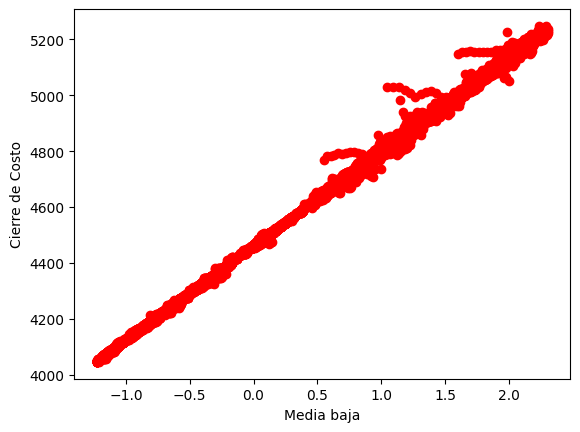

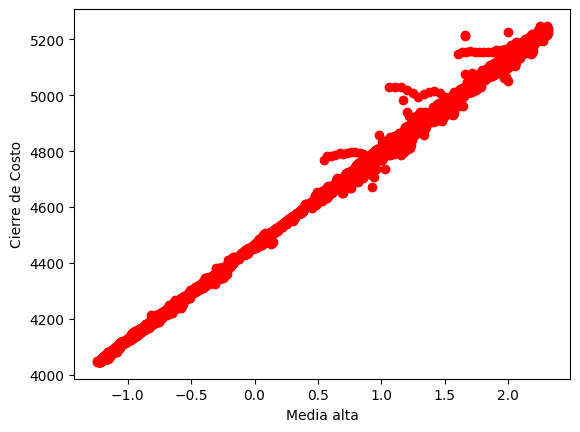

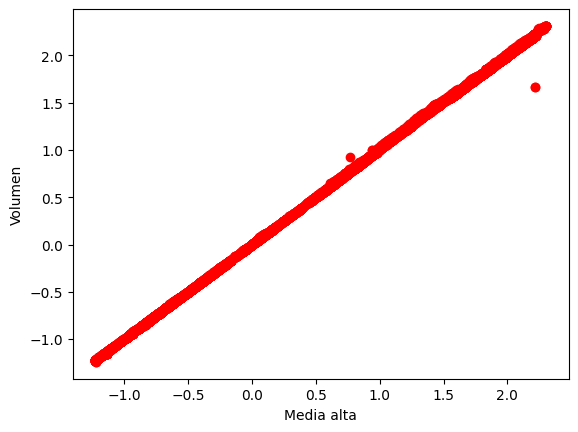

In [ ]:
#Llamamos a la funcion de gráfica 10,9,10
xlabel1 = 'Media baja'
xlabel2 = 'Media alta'
ylabel1 = 'Cierre de Costo'
ylabel2 = "Volumen"

graficarDatos(X_norm.iloc[:, 10], y, xlabel1, ylabel1)
graficarDatos(X_norm.iloc[:, 9], y, xlabel2, ylabel1)
graficarDatos(X_norm.iloc[:, 10], X_norm.iloc[:, 9], xlabel2, ylabel2)

# 2.2 Descenso por el **Gradiente**

## Aplicamos y calculamos la Función de Costo

In [ ]:
# Añadimos el termino de intersección
# Columna de 1 para X0
# m = numero de filas

X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
#mostramos el resultado de X concatenado con X
print(X_ready[:5])
# X_ready.shape

[[ 1.00000000e+00  4.55000460e-01 -7.56069714e-01 -7.57632795e-01
  -7.56850002e-01  5.87486110e-01  4.66984592e-01  2.99630382e-01
  -7.67156852e-01 -7.65891304e-01 -7.69411714e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.71540561e-01]
 [ 1.00000000e+00  4.55105207e-01 -7.59042302e-01 -7.57632795e-01
  -7.62810355e-01  1.34919679e+00  1.16812836e+00  7.90565059e-01
  -7.67156852e-01 -7.65891304e-01 -7.66443973e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.77480084e-01]
 [ 1.00000000e+00  4.55209954e-01 -7.62014891e-01 -7.63563940e-01
  -7.62810355e-01 -3.98918764e-02 -1.11497836e-01 -1.06585480e-01
  -7.67156852e-01 -7.65891304e-01 -7.66443973e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.71540561e-01]
 [ 1.00000000e+00  4.55314702e-01 -7.64987480e-01 -7.63563940e-01
  -7.65790531e-01  1.84857061e-01  9.

In [ ]:
def calcularCosto(X, y, theta):
  # Inicializamos algunos valores utiles
  m = y.shape[0] # número de ejemplos de entrenamiento

  J = 0  # resultado del costo j(0)
  h = np.dot(X, theta) # hipotesis calculado por el producto

  J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

In [ ]:
theta = np.array([1, 0.455000, -0.756070,	-0.757633, -0.756850,	0.587486,	0.466985,	0.299630,	-0.767157, -0.765891,	-0.769412, -0.767717,	0.114549,	-0.080046, 0.010156, -0.042671,	-0.057833, -0.771541])
JJ = calcularCosto(X_ready, y, theta)
print(f"Cont theta: { theta } se obtiene un Cierre de precio: {JJ}")

Cont theta: [ 1.        0.455    -0.75607  -0.757633 -0.75685   0.587486  0.466985
  0.29963  -0.767157 -0.765891 -0.769412 -0.767717  0.114549 -0.080046
  0.010156 -0.042671 -0.057833 -0.771541] se obtiene un Cierre de precio: 10001435.869759606


In [ ]:
theta_ = np.array([1,  4.55000460e-01, -7.56069714e-01, -7.57632795e-01,
  -7.56850002e-01,  5.87486110e-01,  4.66984592e-01,  2.99630382e-01,
  -7.67156852e-01, -7.65891304e-01, -7.69411714e-01, -7.67717201e-01,
   1.14549333e-01, -8.00461885e-02,  1.01556199e-02, -4.26714358e-02,
  -5.78333517e-02, -7.71540561e-01])

JJ_2 = calcularCosto(X_ready, y, theta_)
print(f"Cont theta_: { theta_ } se obtiene un Cierre de precio: {JJ_2}")

Cont theta_: [ 1.          0.45500046 -0.75606971 -0.7576328  -0.75685     0.58748611
  0.46698459  0.29963038 -0.76715685 -0.7658913  -0.76941171 -0.7677172
  0.11454933 -0.08004619  0.01015562 -0.04267144 -0.05783335 -0.77154056] se obtiene un Cierre de precio: 10001435.869437924


In [ ]:
#funcion por el Descenso por el Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0] #33077 numero de ejemplos de entrenamiento
  theta = theta.copy() # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

  J_history = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(calcularCosto(X, y, theta))

  return theta, J_history

## **3.2.1 Seleccionando coheficientes de aprendizaje**

Los valores de theta calculados son: [ 4.37867233e+03  1.64959267e-01  4.19781513e+01  4.19622584e+01
  4.20269285e+01 -4.03108073e+00 -5.05666949e-01  5.12209297e+00
  4.18759773e+01  4.17403526e+01  4.18190165e+01  4.18502568e+01
 -4.59731600e-01  6.82145947e-01  1.28130211e+00  1.24433770e+00
  6.90133060e-01  4.18045376e+01]
Con un Cierre de Precio: 3342.0389596029645


Text(0, 0.5, 'Cierre de costo J')

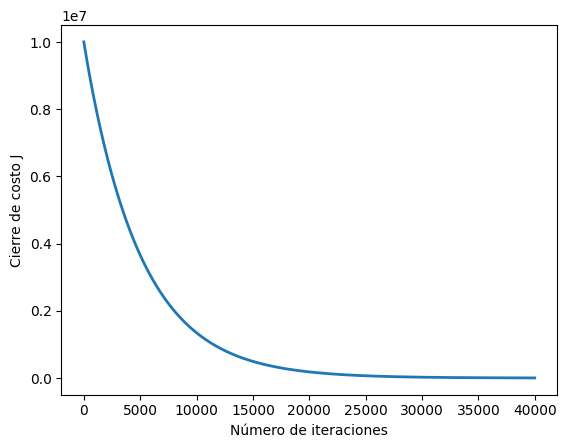

In [ ]:
theta = np.zeros(18)

num_iter = 40000
alpha = 0.0001

theta, J_history = calcularDescensoGradiente(X_ready, y, theta, alpha, num_iter)
print(f"Los valores de theta calculados son: { theta }")
print(f"Con un Cierre de Precio: { J_history[-1] }")

# Grafica de la convergencia del Cierre de Precio
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel("Número de iteraciones")
plt.ylabel("Cierre de costo J")

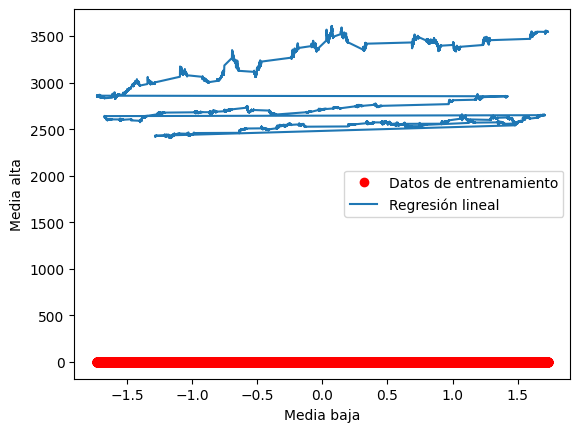

In [ ]:
# Haciendo pruebas
graficarDatos(X_ready[:, 1], X_ready[:, 17], xlabel1, xlabel2)

plt.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

plt.legend(['Datos de entrenamiento', 'Regresión lineal'])

In [ ]:
# Haciendo pruebas con valores
y_pred = np.dot([1, 0.455315, -0.764987,	-0.763564,	-0.765791,	0.184857,	0.095274,	0.150829,	-0.767157,	-0.765891,
                 -0.766444,	-0.767717,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	-0.753722], theta)

print(y_pred)

2566.4058803116113


In [ ]:
# Haciendo otras pruebas con diferentes valores
y_pred = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
                 2.198422,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	2.186342], theta)

print(y_pred)

3548.259923389481


Viendo los resultados vemos que se aproximan los calculos de precios en ambos predicciones.

# 2.3 Ecuacion de la **Normal**

In [ ]:
#Declaramos la funcion de la ecuacion normal para calcular thetas
def calcularThetaEcuacionNormal(X, y):
  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
  return theta


In [ ]:
# Se debe agregar una columnas de unos 1 al dataset
X_rem = np.concatenate([np.ones((m, 1)), X], axis = 1)

In [ ]:
theta = calcularThetaEcuacionNormal(X_rem, y)
print(f"Los valores de theta calculados son: { theta }")

Los valores de theta calculados son: [ 8.74663216e-02  7.28160952e-07  2.18100233e-01  1.76957523e-01
  4.22682927e-01 -5.35494742e-05  9.78991428e-10  1.33915279e-04
  4.52627312e-01 -2.86657436e-02 -2.65227245e-02 -2.36765566e-01
  6.66558737e-03 -2.15089118e-02  1.69650176e-01  4.32785443e-02
 -5.81567112e-02  2.15719688e-02]


In [ ]:
# Verificar pruebas del calculo
# Haciendo pruebas con valores
X_array = np.dot([1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205], theta)

# X_array = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
#                  2.198422,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	2.186342], theta)

price = np.dot(X_array, theta)

print("date: 20879\n, open_price: 4206\n, maximim_value: 4206\n, minimum_value: 4205\n, volume: 4451\n, financial: 18720019\n, negotiations: 1175\n, mme13: 4202\n, mme72: 4202\n, high_mean: 4202\n, low_mean: 4201\n, diffMACD: 0\n, deaMACD: 0\n, MACDlh: 0\n, difflh: 0\n, dealh: 0\n, target: 4201")
print('Precio predecido para un "Cierre de costo" con cada una de sus caracteristicas, usando la Ecuación Normal es: ${:.2f}'.format(price[0]))

date: 20879
, open_price: 4206
, maximim_value: 4206
, minimum_value: 4205
, volume: 4451
, financial: 18720019
, negotiations: 1175
, mme13: 4202
, mme72: 4202
, high_mean: 4202
, low_mean: 4201
, diffMACD: 0
, deaMACD: 0
, MACDlh: 0
, difflh: 0
, dealh: 0
, target: 4201
Precio predecido para un "Cierre de costo" con cada una de sus caracteristicas, usando la Ecuación Normal es: $346.44


# **Regresión Polinomial**

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# 2 Regresión **polinómica**

Se implementa la regresión polinomial para predecir el Cierre de costo de un cierto tiempo que pasa, esto en dólares donde se calcula el precio como objetivo.

# Preparación de los **datos** *

In [ ]:
# Cargar datos
df = pd.read_csv('/content/gdrive/MyDrive/SIS420-IA/Material/Datasets/database_15min.csv', delimiter=',')

In [ ]:
# Mostramos los datos
df

,21-11-19 09:03,4206.0,4206.5,4204.5,4206.0.1,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.44,-0.377,4200.0
0,21-11-19 09:04,4206.5,4206.5,4205.0,4205.5,4451,187200190.0,1175,4202.1,4202.5,4202.9,4201.3,-0.304,-0.136,0.459,-0.090,-0.320,4201.0
1,21-11-19 09:05,4205.5,4206.5,4203.0,4204.5,6515,273933345.0,1627,4202.5,4202.5,4203.1,4201.4,-0.099,-0.134,0.679,0.105,-0.235,4199.0
2,21-11-19 09:06,4204.5,4204.5,4203.0,4203.5,2751,115640535.0,801,4202.6,4202.5,4203.1,4201.4,-0.005,-0.127,0.658,0.176,-0.153,4201.0
3,21-11-19 09:07,4203.0,4204.0,4202.0,4202.5,3360,141218695.0,1038,4202.6,4202.5,4203.1,4201.4,-0.007,-0.120,0.486,0.151,-0.092,4207.0
4,21-11-19 09:08,4202.0,4203.0,4201.5,4202.0,2545,106941715.0,900,4202.5,4202.5,4203.1,4201.4,-0.051,-0.116,0.290,0.089,-0.056,4211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,31-03-20 12:45,5197.0,5197.5,5196.5,5197.0,63,3274000.0,24,5196.3,5196.3,5196.8,5195.7,-0.120,-0.811,0.189,0.334,0.240,5197.5
33073,31-03-20 12:46,5196.5,5197.5,5196.0,5197.5,76,3949415.0,27,5196.5,5196.4,5196.9,5195.7,-0.010,-0.765,0.254,0.398,0.271,5197.0
33074,31-03-20 12:47,5197.5,5198.0,5197.0,5198.0,108,5613470.0,43,5196.7,5196.4,5197.0,5195.8,0.127,-0.714,0.340,0.484,0.314,5198.0
33075,31-03-20 12:48,5197.5,5198.0,5197.0,5197.5,84,4365980.0,28,5196.8,5196.4,5197.1,5195.9,0.204,-0.662,0.307,0.506,0.352,5197.0


In [ ]:
# REALIZAMOS ALGUNOS AJUSTES

#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = df.columns.get_loc('4206.0.1')
columnas = list(df.columns)
columnas.pop(indice_columna)
columnas.append('4206.0.1')
df = df[columnas]
# df.info()

# ========================================================================================================

#variables categoricas, donde convertimos a int64
columnas_categoricas = df.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  df[columna] = le.fit_transform(df[columna])

# Mostramos los resultados del Dataset
# print(df)

# ========================================================================================================

# Convertimos a int64 a todos los valores de X
df = df.astype('int64', errors='ignore')


#Verificamos todos los datos del Dataset
print("INFORMACION")
print(df)
print("\nTIPOS DE DATOS")
df.info()
print("\nDATOS VACIOS")
print(pd.isnull(df).sum())

INFORMACION
       21-11-19 09:03  4206.0  4206.5  4204.5  5024  211292030.0  1443  \
0               20879    4206    4206    4205  4451    187200190  1175   
1               20880    4205    4206    4203  6515    273933345  1627   
2               20881    4204    4204    4203  2751    115640535   801   
3               20882    4203    4204    4202  3360    141218695  1038   
4               20883    4202    4203    4201  2545    106941715   900   
...               ...     ...     ...     ...   ...          ...   ...   
33072           33065    5197    5197    5196    63      3274000    24   
33073           33066    5196    5197    5196    76      3949415    27   
33074           33067    5197    5198    5197   108      5613470    43   
33075           33068    5197    5198    5197    84      4365980    28   
33076           33069    5197    5197    5196   129      6704035    38   

       4201.6  4202.4  4202.8  4201.2  -0.637  -0.126  -0.125  -0.44  -0.377  \
0        4202    42

## **2.1 Normalización de Características**
Viendo los datos da cada caracteristicas se observa que tienen diferentes magnitudes por lo cual normalizamos los datos de cada columna para que tengan valores similares y que el descenso gradiende pueda converger mas rápido.

In [ ]:
# Normalizar los datos

X = df.iloc[:, :17]
y = df.iloc[:, 17]

m = y.size

print(m)

# imprimir algunos puntos de datos
for i in range(20):
  print('{:8.0f}{:10.0f}'.format(X.iloc[i, 0], X.iloc[i, 1], X.iloc[i, 2], X.iloc[i, 3], X.iloc[i, 4], X.iloc[i, 5],
                                 X.iloc[i, 6], X.iloc[i, 7], X.iloc[i, 8], X.iloc[i, 9], X.iloc[i, 10], X.iloc[i, 11],
                                 X.iloc[i, 12], X.iloc[i, 13], X.iloc[i, 14], X.iloc[i, 15], X.iloc[i, 16],  y[i]))

33077
   20879      4206
   20880      4205
   20881      4204
   20882      4203
   20883      4202
   20884      4201
   20885      4199
   20886      4199
   20887      4200
   20888      4202
   20889      4199
   20890      4201
   20891      4200
   20892      4199
   20893      4200
   20894      4201
   20895      4199
   20896      4201
   20897      4207
   20898      4211


In [ ]:
def plotData(x, y):
  # Grafica los puntos x e y en una figura nueva
  fig = plt.figure() # abre una nueva figura

  plt.plot(x, y, 'ro', ms=10, mec='k')
  plt.xlabel('Información por minutos')
  plt.ylabel('Precios de las acciones')

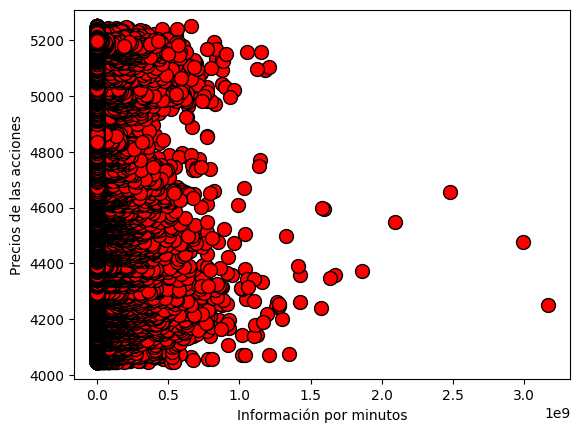

In [ ]:
plotData(X, y)

In [ ]:
# X = np.concatenate([X, X * X], axis=1)

# print(X)

[[   20879     4206     4206 ...        0        0 17648401]
 [   20880     4205     4206 ...        0        0 17631601]
 [   20881     4204     4204 ...        0        0 17648401]
 ...
 [   33067     5197     5198 ...        0        0 27019204]
 [   33068     5197     5198 ...        0        0 27008809]
 [   33069     5197     5197 ...        0        0 27008809]]


In [ ]:
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1]) # 34, promedio, media
  sigma = np.zeros(X.shape[1])  # desviasión estandar

  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma


In [ ]:
# Llamar a la funcion de normalización con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [ ]:
# mostrar los datos normalizados
# X_norm.shape
X_norm

,21-11-19 09:03,4206.0,4206.5,4204.5,5024,211292030.0,1443,4201.6,4202.4,4202.8,4201.2,-0.637,-0.126,-0.125,-0.44,-0.377,4200.0
0,0.455000,-0.756070,-0.757633,-0.756850,0.587486,0.466985,0.299630,-0.767157,-0.765891,-0.769412,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.771541
1,0.455105,-0.759042,-0.757633,-0.762810,1.349197,1.168128,0.790565,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.777480
2,0.455210,-0.762015,-0.763564,-0.762810,-0.039892,-0.111498,-0.106585,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.771541
3,0.455315,-0.764987,-0.763564,-0.765791,0.184857,0.095274,0.150829,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.753722
4,0.455419,-0.767960,-0.766530,-0.768771,-0.115915,-0.181818,0.000942,-0.767157,-0.765891,-0.766444,-0.767717,0.114549,-0.080046,0.010156,-0.042671,-0.057833,-0.741843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33072,1.731452,2.189766,2.181249,2.196505,-1.031887,-1.019860,-0.950515,2.189193,2.197494,2.180523,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342
33073,1.731557,2.186793,2.181249,2.196505,-1.027090,-1.014400,-0.947257,2.189193,2.197494,2.180523,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342
33074,1.731662,2.189766,2.184215,2.199485,-1.015280,-1.000948,-0.929879,2.189193,2.197494,2.183491,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.189312
33075,1.731767,2.189766,2.184215,2.199485,-1.024137,-1.011032,-0.946171,2.189193,2.197494,2.183491,2.195441,0.114549,-0.080046,0.010156,-0.042671,-0.057833,2.186342


Despues de normalizar los datos de X caracteristicas la funcion es provada, y se añale el termino de interseccion X_norm

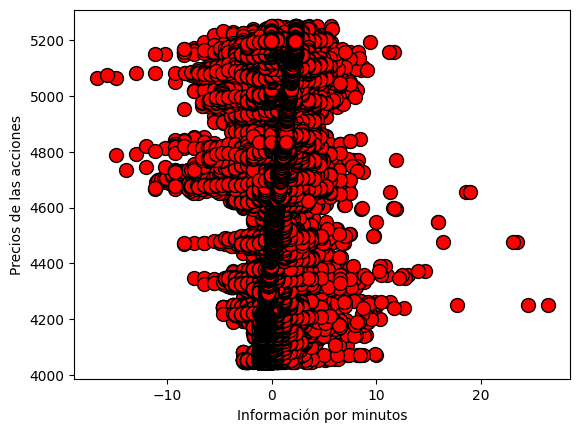

In [ ]:
# Graficamos los datos ya normalizados
plotData(X_norm, y)

In [ ]:
# Añadir el termino de intersección a X
# Columna de unos para X0

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X[:5])

[[ 1.00000000e+00  4.55000460e-01 -7.56069714e-01 -7.57632795e-01
  -7.56850002e-01  5.87486110e-01  4.66984592e-01  2.99630382e-01
  -7.67156852e-01 -7.65891304e-01 -7.69411714e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.71540561e-01]
 [ 1.00000000e+00  4.55105207e-01 -7.59042302e-01 -7.57632795e-01
  -7.62810355e-01  1.34919679e+00  1.16812836e+00  7.90565059e-01
  -7.67156852e-01 -7.65891304e-01 -7.66443973e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.77480084e-01]
 [ 1.00000000e+00  4.55209954e-01 -7.62014891e-01 -7.63563940e-01
  -7.62810355e-01 -3.98918764e-02 -1.11497836e-01 -1.06585480e-01
  -7.67156852e-01 -7.65891304e-01 -7.66443973e-01 -7.67717201e-01
   1.14549333e-01 -8.00461885e-02  1.01556199e-02 -4.26714358e-02
  -5.78333517e-02 -7.71540561e-01]
 [ 1.00000000e+00  4.55314702e-01 -7.64987480e-01 -7.63563940e-01
  -7.65790531e-01  1.84857061e-01  9.

# **2.2 Descenso por el Gradiente**

In [ ]:
# Declaramos la funcion de costo

def computeCostMulti(X, y, theta):
  # Inicializamos el número de ejemplos de entrenamiento
  m = y.shape[0]

  J = 0
  h = np.dot(X, theta)

  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

  return J

In [ ]:
# Declaramos la función el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iter):

  m = y.shape[0]
  theta = theta.copy()
  J_history = [] # historial de costo

  for i in range(num_iter):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(computeCostMulti(X, y, theta))

  return theta, J_history


## 3.2.1 Seleccionando coheficientes de aprendizaje

In [ ]:
X.shape

(33077, 18)

theta calculado por el descenso por el gradiente: [ 4.37867233e+03  1.64959267e-01  4.19781513e+01  4.19622584e+01
  4.20269285e+01 -4.03108073e+00 -5.05666949e-01  5.12209297e+00
  4.18759773e+01  4.17403526e+01  4.18190165e+01  4.18502568e+01
 -4.59731600e-01  6.82145947e-01  1.28130211e+00  1.24433770e+00
  6.90133060e-01  4.18045376e+01]
El precio de las acciones de la moneda dólar (usando el descenso por el gradiente): $5818


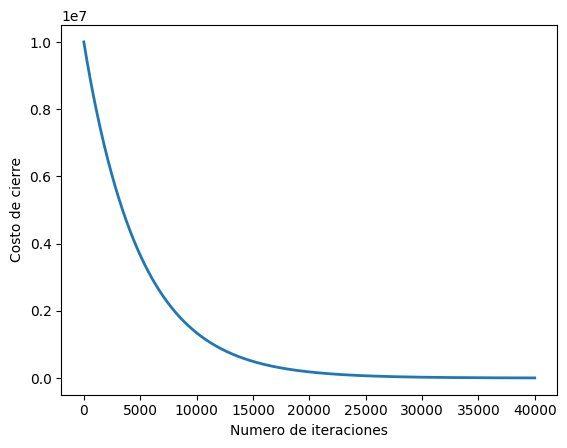

In [ ]:
# Elejimos algun valor para alpha (provar varias alternativas)
alpha = 0.0001
num_iter = 40000

# Inicializar theta y ejecuta el descenso el gradiente
theta = np.zeros(18)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iter)

# Graficar la convergencia de la prediccion a aplicar
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo de cierre')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# El precio de las acciones con los siguientes valores
# X_array = [1, 20882,	4205,	4206,	4203,	6515,	27393334,	1627,	4202,	4202,	4203,	4201,	0, 0,	0, 0, 0, 4199, 4204]

X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]

# X_array = np.dot([1, 1.731871,	2.189766,	2.181249,	2.196505,	-1.007530,	-0.992132,	-0.935309,	2.189193,	2.197494,	2.183491,
#                  2.198422,	0.114549,	-0.080046,	0.010156,	-0.042671,	-0.057833,	2.186342], theta)

X_array[1:18] = (X_array[1:18] - mu) / sigma
price = np.dot(X_array, theta)

print('El precio de las acciones de la moneda dólar (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [ ]:
print('Shape of X_array:', len(X_array))
print('Shape of theta[:17]:', theta.shape)

Shape of X_array: 18
Shape of theta[:17]: (18,)


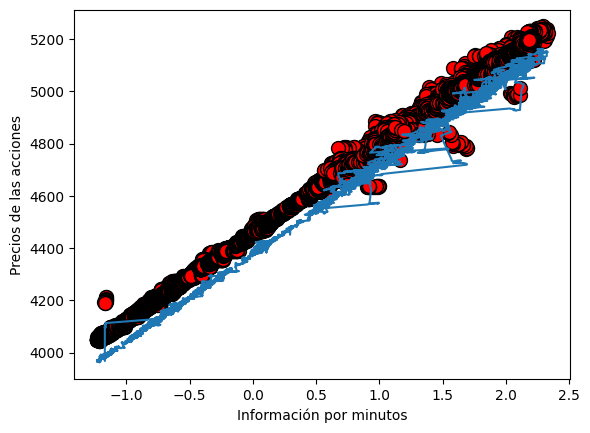

In [ ]:
plotData(X[:, 17], y)
plt.plot(X[:, 17], np.dot(X, theta), '-')

In [ ]:
# Haciendo algunas predicciones
X_array = [1, 33065, 5197, 5197, 5196, 63, 327400, 24, 5196, 5196, 5196, 5195, 0, 0, 0, 0, 5197, 5197]
X_array[1:18] = (X_array[1:18] - mu) / sigma

X_array[1:18]
print(np.dot(X_array, theta))

7209.755388338124


In [ ]:
# X_array = [1, 33065, 5197, 5197, 5196, 63, 327400, 24, 5196, 5196, 5196, 5195, 0, 0, 0, 0, 5197, 5197]

X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]
X_array[1:18] = (X_array[1:18] - mu) / sigma

In [ ]:
X_array[1:18]
print(np.dot(X_array, theta))

5818.229717563337


Como resultado de la prediccion con los datos de X  se produjo un Costo 5818.95

# **2.3 Ecuación de la Normal**

La ecuación de la normal se aplica para que la convergencia sea mas rapido en el calculo de la regresión.

In [ ]:
# Cargar datos
data_f = pd.read_csv('/content/gdrive/MyDrive/SIS420-IA/Material/Datasets/database_15min.csv', delimiter=',')

In [ ]:
# Realizamos algunos ajustes en el Dataset

#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "4206.0.1"
indice_columna = data_f.columns.get_loc('4206.0.1')
columnas = list(data_f.columns)
columnas.pop(indice_columna)
columnas.append('4206.0.1')
data_f = data_f[columnas]
# data_f.info()



#variables categoricas, donde convertimos a int64
columnas_categoricas = data_f.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  data_f[columna] = le.fit_transform(data_f[columna])


# Mostramos los resultados del Dataset
# print(data_f)


# Convertimos a int64 a todos los valores de X
data_f = data_f.astype('int64', errors='ignore')


#Verificamos todos los datos del Dataset
print("INFORMACION")
print(data_f)
print("\nTIPOS DE DATOS")
data_f.info()
print("\nDATOS VACIOS")
print(pd.isnull(data_f).sum())

INFORMACION
       21-11-19 09:03  4206.0  4206.5  4204.5  5024  211292030.0  1443  \
0               20879    4206    4206    4205  4451    187200190  1175   
1               20880    4205    4206    4203  6515    273933345  1627   
2               20881    4204    4204    4203  2751    115640535   801   
3               20882    4203    4204    4202  3360    141218695  1038   
4               20883    4202    4203    4201  2545    106941715   900   
...               ...     ...     ...     ...   ...          ...   ...   
33072           33065    5197    5197    5196    63      3274000    24   
33073           33066    5196    5197    5196    76      3949415    27   
33074           33067    5197    5198    5197   108      5613470    43   
33075           33068    5197    5198    5197    84      4365980    28   
33076           33069    5197    5197    5196   129      6704035    38   

       4201.6  4202.4  4202.8  4201.2  -0.637  -0.126  -0.125  -0.44  -0.377  \
0        4202    42

In [ ]:
# Separamos nuestro datos de X e Y
X = data_f.iloc[:, :17] # : todas las filas, :17 las 17 primeras columnas
y = data_f.iloc[:, 17] # : todas las filas, 17 pero solo la columna en posición 17 (18)
m = y.size

X_original = X.copy()
# X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
X.shape

(33077, 18)

In [ ]:
# Definimos la ecuación de la normal
def ecuacionNormal(X, y):

  theta = np.zeros(X.shape[1])
  theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

  return theta

In [ ]:
# Calculamos los parámetros con la ecuación de la normal
theta = ecuacionNormal(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuacióon de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

# Estimar los Costos de cierre o precio por acciones con los siguientes datos
X_array = [1, 20879,	4206,	4206, 4205,	4451,	18720019,	1175,	4202,	4202,	4202,	4201,	0,	0,	0,	0,	4201,	4205]
price = np.dot(X_array, theta)
print('Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 8.74663216e-02  7.28160952e-07  2.18100233e-01  1.76957523e-01
  4.22682927e-01 -5.35494742e-05  9.78991428e-10  1.33915279e-04
  4.52627312e-01 -2.86657436e-02 -2.65227245e-02 -2.36765566e-01
  6.66558737e-03 -2.15089118e-02  1.69650176e-01  4.32785443e-02
 -5.81567112e-02  2.15719688e-02]
Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : $3961


In [ ]:
# Otra predicción con la ecuacion de la normal

# Calculamos los parámetros con la ecuación de la normal
theta = ecuacionNormal(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuacióon de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))

X_array = [1, 33067,	5197,	5198,	5197,	108,	5613470,	43,	5196,	5196,	5197,	5195,	0,	0,	0,	0,	0,	5198]
price = np.dot(X_array, theta)
print('Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : ${:.0f}'.format(price))


Theta calculado a partir de la ecuación de la normal: [ 8.74663216e-02  7.28160952e-07  2.18100233e-01  1.76957523e-01
  4.22682927e-01 -5.35494742e-05  9.78991428e-10  1.33915279e-04
  4.52627312e-01 -2.86657436e-02 -2.65227245e-02 -2.36765566e-01
  6.66558737e-03 -2.15089118e-02  1.69650176e-01  4.32785443e-02
 -5.81567112e-02  2.15719688e-02]
Precio predecido para una informacion 1, 33069, 5197,	5197,	5196,	129, 6704035, 38, 5196, 5196, 5197, 5196, 0, 0, 0,	0, 0,	5197, a un Coste de cierre de: 5197 : $5197


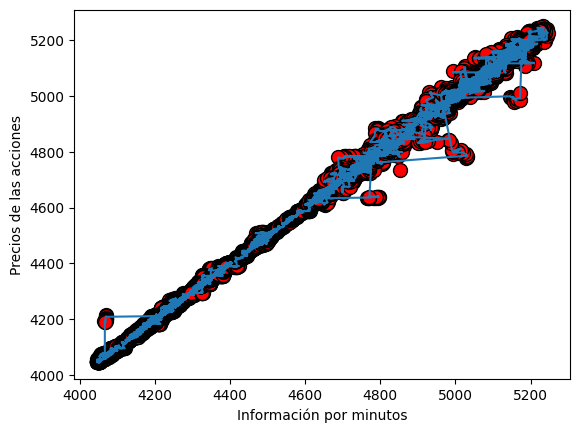

In [ ]:
# Generamos la gráfica
plotData(X[:, 17], y)
plt.plot(X[:, 17], np.dot(X, theta), '-')

En conclusión en las predicciones las mejores thetas se hallaron apartir de la ecuacion de la Noormal.